# Project Template

<font color="PURPLE" size=4>Author: </font> Mylonaki Angeliki

A guide for applying machine learning on a dataset.

## Step 1: Prepare Project

1. Load libraries
2. Load dataset

In [10]:
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

import numpy as np
import pandas as pd

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

boston=load_boston()
names=boston['feature_names'].tolist() + ['class']
df = pd.DataFrame(data= np.c_[boston['data'], boston['target']], columns=names )
array=df.values

## Step 2: Define Problem
What is your task? What are your goals? What do you want to achieve?

Based on the combination on the features in the "Boston Housing Dataset" we want to find/train the best model so as to be able to make predictions about a home's value when given specific information about it. 

## Step 3: Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset.
Summarise your data. Explore descriptive statistics and visualisations.

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  class  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
class      float64
dtype: object

There are no missing values in given dataset

Class distribu

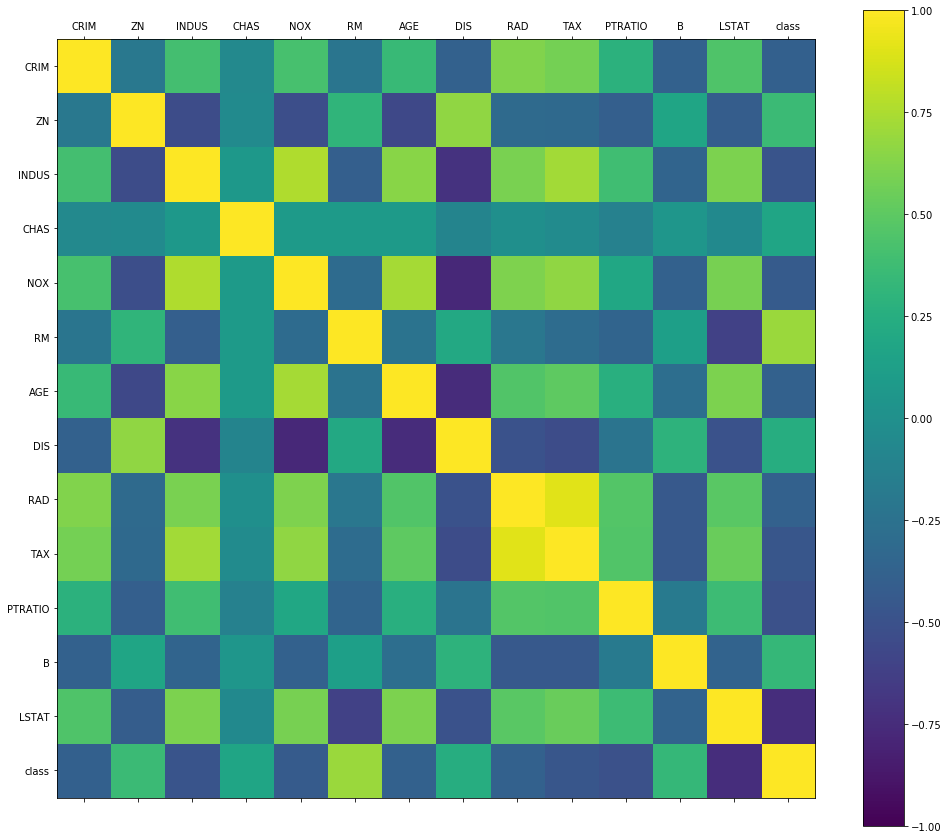

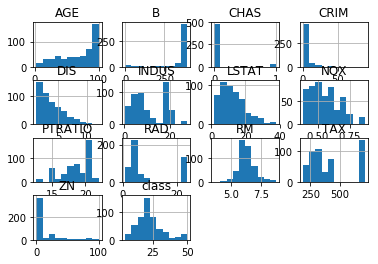

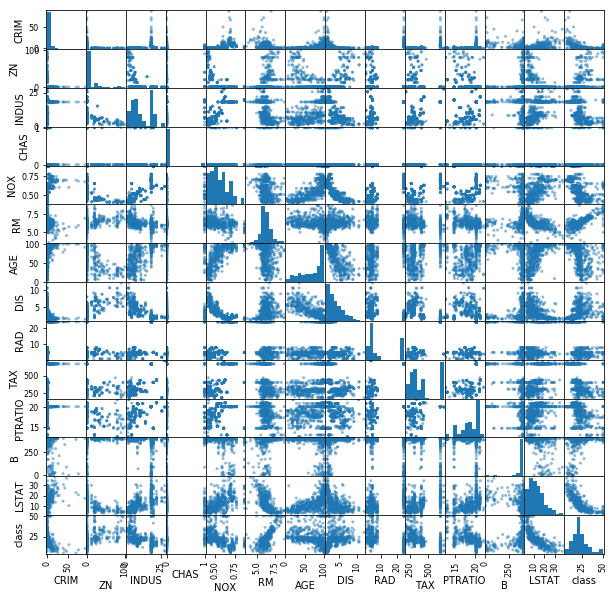

In [11]:

#Peek of our data
print(df.head(5))

#Descriptive Statistics
#print(df.describe())

#Data dimentions
print df.shape

#Data types
print df.dtypes

#Checking for missing values
if not df.isnull().any().any():
    print color.PURPLE + "\nThere are no missing values in given dataset\n" + color.END
else:
    print "\nThere are missing values in the dataset...\nExiting..."
    exit
    
#class distribution
print color.BOLD + "Class distribution: "+ color.END + str(df.groupby('class').size())

def plot_correlations(NoElements, labels):
    correlations = df.corr()
    # plot correlation matrix
    fig = plt.figure(figsize=(17,15))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,NoElements,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.show()
    
def plot_histogram(dataset):
    dataset.hist()
    plt.show()

def plot_scatter_matrix(dataset):
    scatter_matrix(dataset,figsize=(10,10))
    plt.show()
    
def visualize_data(dataset,NoElements,labels):    
    plot_correlations(NoElements,labels)
    plot_histogram(dataset)
    plot_scatter_matrix(dataset)
    
visualize_data(df,14,names)

## Step 4: Prepare Data
Data Cleaning/Data Wrangling/Collect more data (if necessary).

In [12]:
#standardization,normalization,etc
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions


X = array[:,0:13]
Y = array[:,13]

#Getting all possible label values
class_names=np.unique(Y).tolist()

#Normalization
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# summarise transformed data
set_printoptions(precision=3)
print "Normalizing data....."
print(normalizedX[0:5,:])


print "\nStandardizing data....."

scaler = StandardScaler().fit(normalizedX)
rescaledX = scaler.transform(normalizedX)

# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])


Normalizing data.....
[[  1.264e-05   3.600e-02   4.620e-03   0.000e+00   1.076e-03   1.315e-02
    1.304e-01   8.179e-03   2.000e-03   5.919e-01   3.060e-02   7.937e-01
    9.959e-03]
 [  5.785e-05   0.000e+00   1.498e-02   0.000e+00   9.935e-04   1.360e-02
    1.671e-01   1.052e-02   4.237e-03   5.126e-01   3.771e-02   8.408e-01
    1.936e-02]
 [  5.857e-05   0.000e+00   1.517e-02   0.000e+00   1.007e-03   1.542e-02
    1.311e-01   1.066e-02   4.293e-03   5.194e-01   3.820e-02   8.431e-01
    8.650e-03]
 [  7.105e-05   0.000e+00   4.785e-03   0.000e+00   1.005e-03   1.536e-02
    1.005e-01   1.331e-02   6.585e-03   4.873e-01   4.104e-02   8.662e-01
    6.453e-03]
 [  1.506e-04   0.000e+00   4.755e-03   0.000e+00   9.989e-04   1.559e-02
    1.182e-01   1.322e-02   6.543e-03   4.842e-01   4.078e-02   8.656e-01
    1.162e-02]]

Standardizing data.....
[[-0.432  0.281 -1.329 -0.268  0.461  0.607  0.201  0.2   -1.205 -0.655
  -0.461  0.647 -1.061]
 [-0.428 -0.488 -0.359 -0.268  0.025  0.7

## Step 5: Feature Engineering
Feature selection/feture engineering (as in new features)/data transformations.

In [13]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=12)
finalX = pca.fit_transform(rescaledX)
#finalX=rescaledX
print finalX

from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(finalX, Y, test_size=0.20, random_state=7)

[[-1.797 -0.056  0.276 ...,  0.699 -0.294  0.21 ]
 [-1.851  1.187 -0.451 ...,  0.409  0.439 -0.029]
 [-2.397  0.692 -0.123 ...,  0.385  0.391 -0.267]
 ..., 
 [-1.407  2.317 -0.206 ...,  0.069 -0.524  0.376]
 [-1.373  2.341 -0.291 ...,  0.094 -0.489  0.424]
 [-1.194  2.136 -0.434 ...,  0.079 -0.568  0.708]]


## Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

        LR: -20.674449 (+/- 9.000615)
     RIDGE: -20.658191 (+/- 9.013836)
     LASSO: -33.691174 (+/- 14.194744)
   ELASTIC: -34.500066 (+/- 14.904896)
       kNN: -23.088119 (+/- 11.602529)
        DT: -35.436648 (+/- 20.296052)
       SVM: -35.299275 (+/- 18.542940)


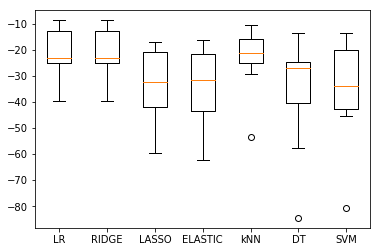

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


kfold = KFold(n_splits=10, random_state=7)
# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',      LinearRegression()))
models.append(('RIDGE',   Ridge()))
models.append(('LASSO',   Lasso()))
models.append(('ELASTIC', ElasticNet()))
models.append(('kNN',     KNeighborsRegressor()))
models.append(('DT',      DecisionTreeRegressor()))
models.append(('SVM',     SVR()))

# The scoring function to use
scoring = 'neg_mean_squared_error'


# We are going to evaluate all classifiers, and store results in two lists:
results = []
names   = []
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("%010s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))
    
plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

## Step 7: Model Training
Apply ensembles and improve performance by hyperparameter optimisation.

In [15]:
from sklearn.model_selection import GridSearchCV

#Using GridSearch to tune hyperparameters for DT
param_grid = {'max_depth': np.arange(3, 10), 'criterion':['mse','friedman_mse'], 'splitter': ['best','random'],
             'min_samples_split':np.arange(1, 10), 'min_samples_leaf':np.arange(1, 10),
              'max_features':['auto','sqrt','log2',"None"]}

tree = GridSearchCV(DecisionTreeRegressor(), param_grid)
print tree.estimator.get_params



<bound method DecisionTreeRegressor.get_params of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')>


## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.

In [24]:
from sklearn.metrics import mean_squared_error
import itertools

tree.estimator.fit(X_train,y_train)
y_pred=tree.estimator.predict(X_test)
print "Mean squared error: " +  str(mean_squared_error(y_test, y_pred))

Mean squared error30.9491176471
